#Title -    Emergency Vehicle Identification
#Name -     T Venkat Reddy

# Importing Libraries

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# reading the data
# replace "paste file path here" with dataset file path
data = pd.read_csv('paste file path here...')

In [ ]:
data.head(10)

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
5,45.jpg,1
6,2313.jpg,0
7,1657.jpg,0
8,294.jpg,1
9,999.jpg,0


# Count of Vehicles


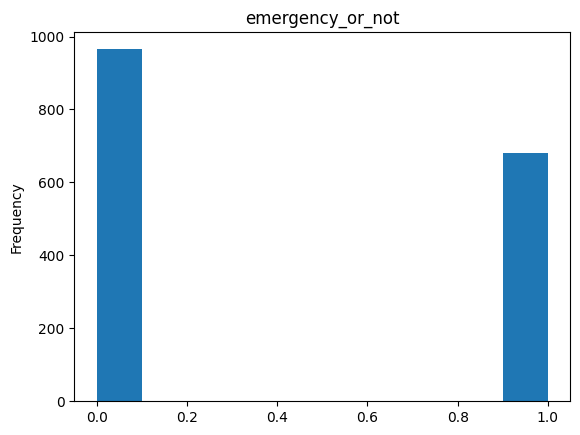

In [ ]:
data['emergency_or_not'].plot(kind='hist',title='emergency_or_not')
plt.show()

#Adding Images to the list

In [ ]:
x = []

for image in data.image_names:
  combine = plt.imread('/content/drive/MyDrive/images/'+image)
  x.append(combine)

#Images

In [ ]:
x = np.array(x)
y = data['emergency_or_not']

In [ ]:
print(x.shape)

(1646, 224, 224, 3)


#splitting the *Dataset*

In [ ]:
from sklearn.model_selection import train_test_split
x=x.reshape(x.shape[0],224*224*3)
x=x/x.max()
X_train,X_valid,y_train,y_valid=train_test_split(x,y,test_size=0.3,random_state=42)

#Importing model and optimizer

In [ ]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#Adding Layers to the Model

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
adam = Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

#Training the Model

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid,y_valid), callbacks=callbacks_list)

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 0.2948 - accuracy: 0.9106
Epoch 1: val_accuracy improved from -inf to 0.69838, saving model to best_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 7s 814ms/step - loss: 0.2948 - accuracy: 0.9106 - val_loss: 0.5890 - val_accuracy: 0.6984
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.2931 - accuracy: 0.9193
Epoch 2: val_accuracy did not improve from 0.69838
9/9 [==============================] - 8s 898ms/step - loss: 0.2931 - accuracy: 0.9193 - val_loss: 0.5916 - val_accuracy: 0.6984
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.2898 - accuracy: 0.9158
Epoch 3: val_accuracy improved from 0.69838 to 0.70445, saving model to best_weights.hdf5
9/9 [==============================] - 10s 1s/step - loss: 0.2898 - accuracy: 0.9158 - val_loss: 0.5877 - val_accuracy: 0.7045
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.2832 - accuracy: 0.9201
Epoch 4: val_accuracy did not improve from 0.70445
9/9 [==============================] - 7s 774ms/step - loss: 0.2832 - accuracy: 0.9201 - val_loss: 0.5887 - val_accuracy: 0.7024
Epoch 5/100
9/9

In [ ]:
from sklearn.metrics import accuracy_score

#Loading the best Weights

In [ ]:
model.load_weights("best_weights.hdf5")

#Finding the Accuracy of the Model

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid,(model.predict(X_valid)>0.7).astype("int32")))

16/16 [==============================] - 2s 120ms/step
Accuracy on validation set: 0.6923076923076923
